# Introduction to toric geometry

#### Author: Matteo Caorsi

In this notebook I will introduce the basics of toric geometry from an intuitive perspective rather than focusing on the formalism.

We shall start understading how to represent polynomial rings and subrings as (sub-)lattices.

## Rings of polynomials

Consider the ring $k[x,y]$. All the elements of this ring are sums of monomials of the form $x^{m_1}y^{m_2}$. The operations in the ring are the usual sum and multiplication.

We can write $m=(m_1,m_2)$ so that $\chi^m = x^{m_1}y^{m_2}$.

Hence, to each point $m$ of a positive lattice $\mathbb Z_+ \times \mathbb Z_+$, we associate a monomial $\chi^m$.

The algebraic torus $k^* = k[x,x^{-1}]$ corresponds to a lattice isomorphic to $\mathbb Z$, where each point is a monomial of the form $x^m, m \in \mathbb Z$.

The higher dimensional generalisation of the torus, i.e. $(k^*)^n$ corresponds to the lattice $\mathbb Z^n$.

### Sublattices

If we take a sublattice of a larger lattice, like the one show below, what are we doing?
We are actually taking a subring of the original ring $k[x,x^{-1},y,y^{-1}]$ corresponding to the full $\mathbb Z^2$ lattice. 



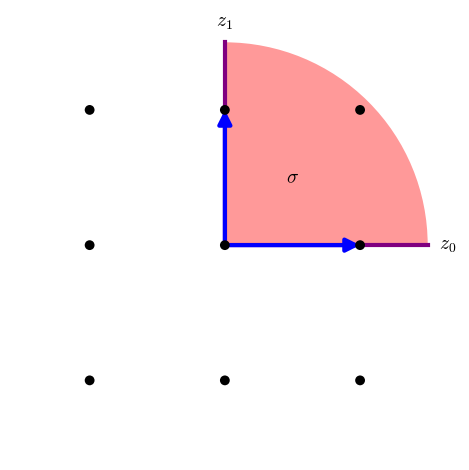

In [1]:
quadrant = Cone([(1,0), (0,1)])
A2 = AffineToricVariety(quadrant)
A2.plot()

The idea would then be to take the spectrum and get a variety, but we know that the map of rings gets reversed when considering the spectrum.

In [2]:
var('x,y,z')
ring = QQ[x,y]
ring

Multivariate Polynomial Ring in x, y over Rational Field

In [3]:
superring_temp = QQ[x,y,z]
ideal = superring_temp.ideal(z*y-1)
superring = superring_temp.quotient(ideal)
superring # this is QQ[x,y,y^{-1}]

Quotient of Multivariate Polynomial Ring in x, y, z over Rational Field by the ideal (y*z - 1)

In [4]:
emb = ring.hom([x,y],codomain=superring)
emb # ring morphism

Ring morphism:
  From: Multivariate Polynomial Ring in x, y over Rational Field
  To:   Quotient of Multivariate Polynomial Ring in x, y, z over Rational Field by the ideal (y*z - 1)
  Defn: x |--> xbar
        y |--> ybar

In [5]:
morph = Spec(emb) # apply spec functor. check that it is reversed!
morph.domain() == Spec(superring)

True

Therefore, to avoid unintuitive reversals of the inclusion order, when we want to work with the rings associated to a fan in the lattice, we first take the dual lattice, and correspondingly the dual cone. The lattice duality has reversed the inclusion: if we take the *Spec*, we reverse again. In this way, drawings of fans will look more intuitive: a fan included in a larger fan corresponds to a small variety included in a larger one. 


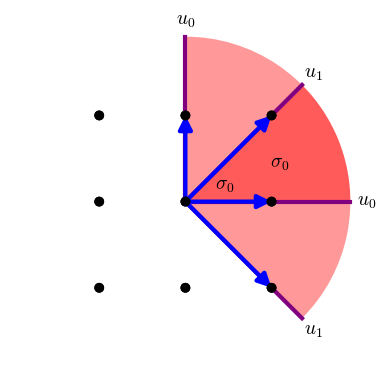

In [6]:
cone = Cone([[1,0],[1,1]])
cone.plot() + cone.dual().plot() # the interior cone is `cone`

## Affine toric variety

All the ingredients we have put together so far are enough to define affine toric varieties! To recap: 
 - a cone corresponds to a subring of the torus ring $k[x,x^{-1},y,y^{-1}]$
 - the spectrum of such a subring is an affine variety
 
As we do for schemes, can we glue together affine toric varieties?


## Generic toric varieties

To glue together affine toric variety, we have to define the glueing maps. It is enough to define them at the ring level, directly on the **dual** lattice.

Conside the following two 2D cones that intersect along a 1D cone (a ray):

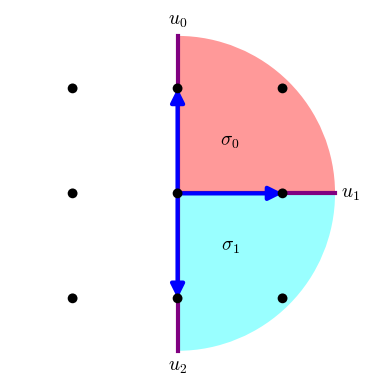

In [7]:
fan = Fan([[0,1],[1,2]],[[0,1],[1,0],[0,-1]])
fan.plot()

In [8]:
fan.cones()

((0-d cone of Rational polyhedral fan in 2-d lattice N,),
 (1-d cone of Rational polyhedral fan in 2-d lattice N,
  1-d cone of Rational polyhedral fan in 2-d lattice N,
  1-d cone of Rational polyhedral fan in 2-d lattice N),
 (2-d cone of Rational polyhedral fan in 2-d lattice N,
  2-d cone of Rational polyhedral fan in 2-d lattice N))

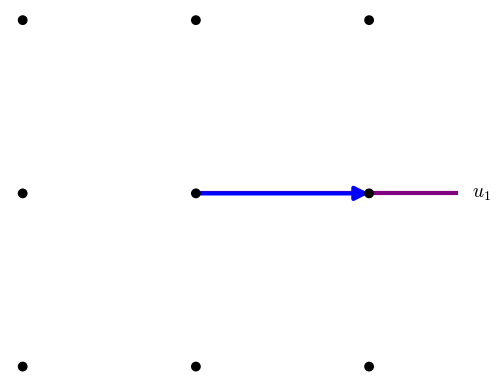

In [9]:
# take one of the 1D cones
cone_1d = fan.cones(1)[1]
cone_1d.plot()


In [10]:
cone_1d_dual = cone_1d.dual()
cone_1d_dual.rays() # this corresponds to the half-plane x>=0!

M(1,  0),
M(0,  1),
M(0, -1)
in 2-d lattice M

So the dual cone of a 1d ray corresponds to a half-plane whose boundary is perpendicular to the ray. If you consider the dual of either $\sigma_0$ or $\sigma_1$ above, they will be both contained into the half-plane $x \geq 0$.

This implies that we can easily build a ring map: the inclusion map. And via the $Spec$ functor, we get the maps that glue the ray to the 2D cones.

In particular, the coordinate rings are: 
 - $\sigma_0$: $k[x,y]$ (remember to work on the dual cone!!)
 - $\sigma_1$: $k[x,y^{-1}]$ 
 - $u_1$: $k[x,y,y^{-1}]$ 
 
and the glueing step is the identification $x_{\sigma_0} = x_{\sigma_1}$ and $y_{\sigma_0} = y^{-1}_{\sigma_1}$.

With this techniques, we can hence interpret geometrically all fans. For example the following is the fan of $kP^2$:

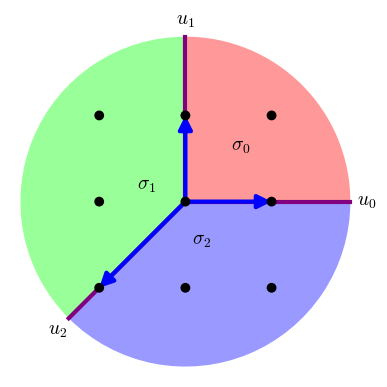

In [11]:
P2.<x,y,z> = toric_varieties.P2()
Sigma = P2.fan()
Sigma.plot()

In [12]:
patch = P2.affine_patch(2)
patch.embedding_morphism()

Scheme morphism:
  From: 2-d affine toric variety
  To:   2-d CPR-Fano toric variety covered by 3 affine patches
  Defn: Defined on coordinates by sending [x : z] to
        [x : 1 : z]

## Torus orbits

There is one final topic before going to divisors and polytopes. The torus $(k^*)^n$ -- that corresponds to the point 0 in the lattice -- acts on itself:

$$ (k^*)^n \times (k^*)^n \to (k^*)^n, ((x_1,...,x_n) , (y_1,...,y_n)) \mapsto (x_1 y_1,...,x_n y_n)$$

and by linear extension, it also acts on the whole toric variety:

$$ (k^*)^n \times X_{\Sigma} \to X_{\Sigma}, ((x_1,...,x_n) , (y_1,...,y_n)) \mapsto (x_1 y_1,...,x_n y_n)$$

Now, there are some special points on the variety that do not belong to the *big* torus $(k^*)^n$. These points are obtained by setting one or more coordinates to zero, e.g. $(0,0,x_2,...,x_n)$.

The action of the torus on such points create orbits. All these closure of orbits are in one-to-one correspondence with the cones of the fan! Indeed, each cone corresponds to a ring $k[x_0,x_1,...x_r,x_r^{-1},...] = k[x_0,x_1,...x_r]_{x_{r+1},...} \sim (k^{n-r}) \times k^r$. The special points that will then generate the orbit are $[1,1,...,1,0,0,...,0]$. 

The **dimension** of the cone corresponds to the **codimension** of the orbit closure.

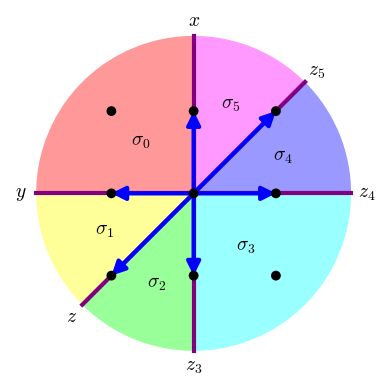

In [13]:
dP6.<x,y,z> = toric_varieties.dP6()
dP6.plot()

In [14]:
pt = dP6.orbit_closure(dP6.fan().cones(2)[2]) # maximal cones correspond to fixed points
pt

0-d affine toric variety

In [15]:
orbit = dP6.orbit_closure(dP6.fan().cones(1)[2])
orbit # this is a P1

1-d toric variety covered by 2 affine patches

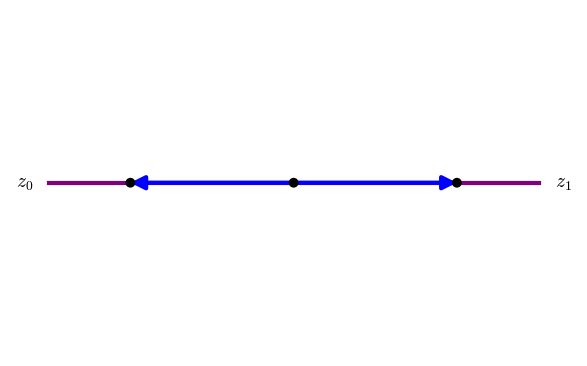

In [16]:
orbit.plot()

In the cases above, we remarked that the closure of the orbit is important. The closure is taken w.r.t to the larger cone containing the cone we are studying.

#### E.G. 
Consider `dP6` above. One realises that the ray $u_1$ -- after analysing the function ring in the dual lattice as described above -- corresponds to $k \times k^*$. The special point would be $(0,1)$, where "1" is arbitrary, just not 0. The orbit of the *big* torus $(k^*)^2$ is $(0,\mu ), \mu \neq 0$. The closure corresponds to adding the points $(0,0)$ and $(0, \infty)$, hence making it a $kP^1$. 

### Counting points
Points are defined as generators and can be iterated over:

In [17]:
P2points = iter(P2.point_set())
[next(P2points) for i in range(10)]

[[0 : 1 : 1],
 [1 : 1 : 1],
 [-1 : 1 : 1],
 [1/2 : 1 : 1],
 [-1/2 : 1 : 1],
 [2 : 1 : 1],
 [-2 : 1 : 1],
 [1/3 : 1 : 1],
 [-1/3 : 1 : 1],
 [3 : 1 : 1]]

In [18]:
P2.change_ring(GF(5)).count_points()

31

Homogeneous coordinate ring
---------------------------

There is a homogeneous coordinate associated to each ray (1d cone) of the fan, in this order:

In [19]:
P2.coordinate_ring()

Multivariate Polynomial Ring in x, y, z over Rational Field

In [20]:
Sigma(1)

(1-d cone of Rational polyhedral fan in 2-d lattice N,
 1-d cone of Rational polyhedral fan in 2-d lattice N,
 1-d cone of Rational polyhedral fan in 2-d lattice N)

Homogeneous rescalings are encoded in the ray map $r$ and divisor map $d$. These are their definitions

$$0 \to M \to^r \mathbb(Z)^{|\Sigma(1)|} \to^d Pic \to 0$$

For smooth varieties, this sequence is exact.

In [21]:
u0, u1, u2 = Sigma.rays() # this is the ray map
u0 + u1 + u2 # hence d = (1,1,1) and makes the sequence exact.

N(0, 0)

This corresponds to the homogenous rescaling $[x:y:z] = [\lambda x: \lambda y:\lambda z]$ 

In [22]:
P2(2,2,2)

[2 : 2 : 2]

### Cartesian product

To obtain the cartesian product between two toric varieties, it is enough to make the lattice product, embed the fans of the factors and consider the variety build out of the product fan. This operation works because associating a toric variety to a fan is a **functor**.

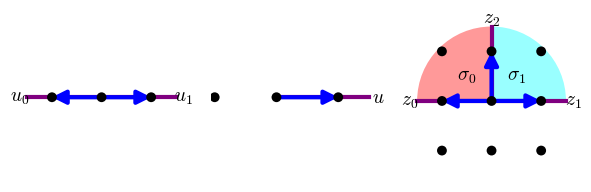

In [23]:
fan_1d = Fan([[0],[1]],[[-1],[1]])
fan_1d_2 = Fan([[0]],[[1]])
fan_prod = fan_1d.cartesian_product(fan_1d_2)
prod_var = ToricVariety(fan_prod)
graphics_array([fan_1d.plot(), # kP1
                fan_1d_2.plot(), # k
                prod_var.plot()]) # kP^1 x k

## Divisors on toric varieties

We have just maded use of the word divisor (in the divisor map), but never mentioned them up to now. Well, now it's the right time.

Divisors are codim 1 sub-varieties and they are extremely useful tools to better understand the geometry of varieties. Thus, their study is an essential step if we want to understand toric varieties.

Since divisors are of codimension 1, the easiest way to get one is to consider a polyomial equation $f=0$. This is perfectly fine, but maybe not very meaningful to consider all of them, as we end up with too many objects. How about we define equivalence classes in which a divisor defined by polynomial equation $f=0$ is equivalent to another divisor $g=0$ is there exists a rational function $h$ such that $f=h*g$? But what is non-trivial then?

Well, let's see!

### Picard group of toric varieties

In terms of lattices, each monomial $\chi^m$ defines a divisor $(\chi^m)$ corresponding to $\chi^m=0$. Notice that naively, $x=0$ and $x^2=0$ define the same set of points. But the order of vanishing is different. This is the reason why we need to enrich the structure of the ring of monomials with a **valuation** $\nu : k[x,y,...] \to \mathbb Z$ that specifies exactly the ordering of vanishing, e.g. $\nu(x^2)=2$.

How can we define equivalence then? As we said before, two divisors $(f)$ and $(g)$ are *linearly equivalent* if $(g) = (f) + (h)$, for $h$ rational function. Here

$$(f) = \sum_{i:\nu(f)>0}\nu(f)\{Z(f)_i\},$$

where $Z(f)$ indicates the zeros of $f$; hence the notation with the "+".
There is a basis of primitive divisors, those corresponding to the rays generators. To make sure the divisor is a closed subvariety, the divisors $D_r = cl(O_r)$ are defined as the closure of the torus orbit associated to the ray (which we saw above but did not immediately realised that it was a divisor).

Can we define equivalence classes of these divisors more concretely, please? Well, let's use the divisors associated to the rays, formally sum them to a generic divisor
$$ D = \sum_{i \in \Sigma(1)}a_iD_i$$

If we now take a generic divisor generated by a monomial $(\chi^m)$, this equality shall hold:
$$(\chi^m)=\sum_{i \in \Sigma(1)}a_iD_i$$
for some $a_i$'s. These $a_i$'s are precisely the valuations by the way.

Linear equivalence implies that for all such monomials, that shall be trivial divisors, we get a linear map sending $(a_1,...,a_n) \to 0$. 

What we have just described is precisely the sequence

$$0 \to M \to^r \mathbb(Z)^{|\Sigma(1)|} \to^d Pic \to 0.$$

In [24]:
P2.<x,y,z> = toric_varieties.P2()
P2.fan().rays() # this is the ray map


N( 1,  0),
N( 0,  1),
N(-1, -1)
in 2-d lattice N

In [25]:
P2.linear_equivalence_ideal() # this is the divisor map (here we see that it is (1,1,1))

Ideal (x - z, y - z) of Multivariate Polynomial Ring in x, y, z over Rational Field

In [26]:
P2.divisor(x), P2.divisor(y), P2.divisor(z)
D = P2.divisor(x) + P2.divisor(y)
D

V(x) + V(y)

In [27]:
D.is_Cartier()

True

The divisors $V(x)$ and $V(y)$ are different but linearly equivalent.

In [28]:
P2.rational_class_group()(D), D.cohomology_class(), D.Chow_cycle()

(Divisor class [2], [2*z], ( 0 | 2 | 0 ))

Since the divisor map is (1,1,1), all the divisors corresponding to rays are associated to the 1d vector (1). Hence the are all equivalent! This is a known fact on projective spaces: the hyperplane divisors are all equivalent

In [29]:
Pic = P2.rational_class_group()
Pic.gens()

(Divisor class [1],)

In [30]:
P2.Kaehler_cone() # This is the cone of all nef divisors -- 1d in this case

1-d cone in 1-d lattice

In [31]:
P2.Mori_cone() # This is the Mori cone, which consists of numerically effective divisors.

1-d cone in 4-d lattice

## Line bundles and section polytope

To each divisor, we can associate uniquely a line bundle $\mathcal O(D)$. Such bundle is define by all those sections that have a pole on the divisor.

What are the sections of such line bundle? Sections will be generated by monomials in the dual lattice, hence we would like to find a polyhedron that encircles all the sections.

Let $$ D = \sum_{i \in \Sigma(1)}a_iD_i$$ a divisor. We define the polar polyhedron $P_D\subset M$ associated to the toric divisor D as
$$P_D = {u \in M | <u,v_i> \geq -a_i for i \in \Sigma(1)}$$

This polyhedron encodes the basis of monomials to generate the global sections of $\mathcal O(D)$.

In [32]:
OD=P2.sheaves.line_bundle(D)
OD

Rank 1 bundle on 2-d CPR-Fano toric variety covered by 3 affine patches.

In [33]:
OD.cohomology(weight=(1,0))

{0: Vector space of dimension 1 over Rational Field,
 1: Vector space of dimension 0 over Rational Field,
 2: Vector space of dimension 0 over Rational Field}

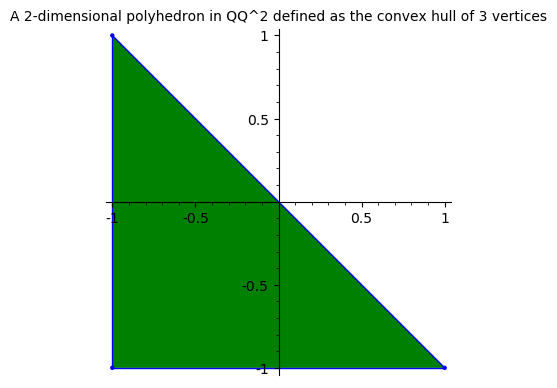

In [34]:
D.polyhedron()

In [35]:
D.sections_monomials() # indeed each point in the polyhedron is a section monomial (in homogeneous coordinates)

(z^2, y*z, y^2, x*z, x*y, x^2)

A final example with the canonical bundle, that is
$$K = - \sum_{i \in \Sigma(1)}D_i$$

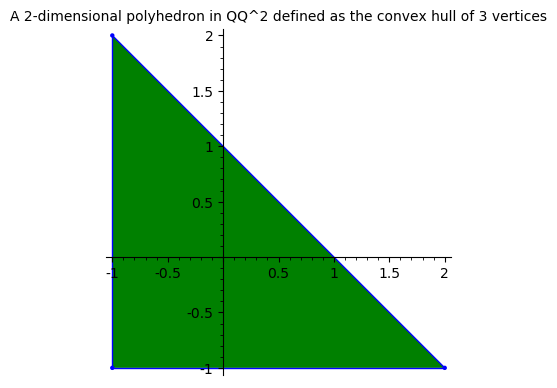

In [36]:
kk = -P2.K()

kk.polyhedron()

In [37]:
kk.sections_monomials()

(z^3, y*z^2, y^2*z, y^3, x*z^2, x*y*z, x*y^2, x^2*z, x^2*y, x^3)

Line bundles are also toric varieties and thus they have a corresponding fan. Unfortunately, SageMath does not yet implement them.

### Face and Normal fans

A lattice polytope containing the origin defines two rational polyhedral fans

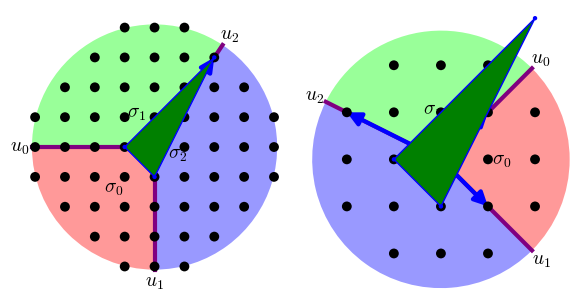

In [38]:
triangle = Polyhedron([(-1, 0), (0, -1), (2,3)])
graphics_array([
        triangle.plot() + FaceFan(triangle).plot(), 
        triangle.plot() + NormalFan(triangle).plot()
])

In [39]:
triangle.is_lattice_polytope()

True

In [40]:
triangle.rays()

()

## Compactification

Toric varieties can be seen as partial compactifications of the torus $(k^*)^n$: Indeed, to the *big* torus we glue divisors and other subvarieties, in general topologically of the form $(k^*)^m \times k^{n-m}$. The final variety is compact if the fan is complete (i.e. the face polytope is defined and full-dimensional). Homogeneous coordinates can vanish simultaneously if and only if they span a cone of the fan. The forbidden set is

In [41]:
P2.is_complete() # compactness

True

## Polynomial equation of complete toric varieties


#### Theorem
A toric variety is complete iff the fan is complete (i.e. all points of the lattice belong to one cone)


If the toric variety is complete, it is possible to consider the polytope $P$ generated by the ray generators. The integral points in the interior of such polytope are the points defining a map from $k^n \to kP^{N}$, where $n$ is the dimension of the toric lattice and $N$ the number of integral points inside the polytope $P$.

In [42]:
vertices = [ray.row().list() for ray in P2.fan().rays()] # vertices from ray generators

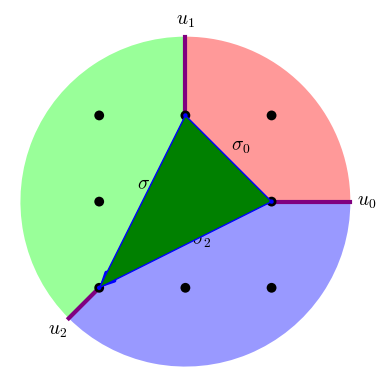

In [43]:
P = LatticePolytope(vertices)
polyhed = P.polyhedron()
polyhed.plot() + P2.fan().plot()

In [44]:
NN = polyhed.integral_points_count() # dimension of codomain P^N
polyhed.integral_points() # integral points defining the equations

((-1, -1), (0, 0), (0, 1), (1, 0))

To actually compute the embedding, we can exploit the kodaira map of the canonical divisor of the toric variety associated to the normal fan of the polytope.


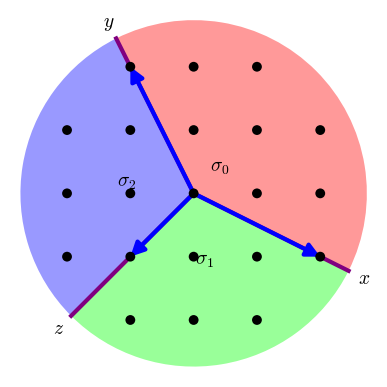

In [45]:
dual_fan = NormalFan(polyhed) # will explain later how to get this via polar polyhedra
variety.<x,y,z> = ToricVariety(dual_fan)
variety.plot()

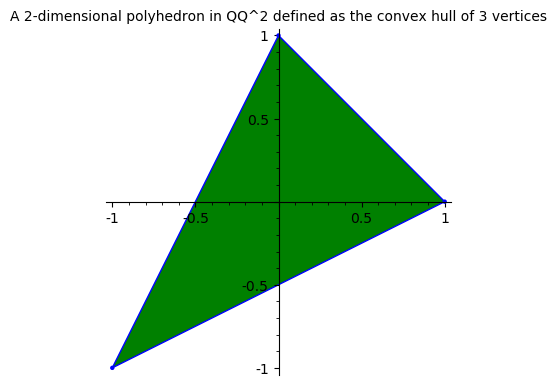

In [46]:
dualK = -variety.K()
dualK.polyhedron() # we see indeed it is the polytope of P2


In [47]:
dualK.Kodaira_map()

Scheme morphism:
  From: 2-d toric variety covered by 3 affine patches
  To:   Closed subscheme of Projective Space of dimension 3 over Rational Field defined by:
  -z1^3 + z0*z2*z3
  Defn: Defined on coordinates by sending [x : y : z] to
        (z^3 : x*y*z : y^3 : x^3)

In the case above, the embedding is defined via
$$(x,y) \mapsto [x^{-1}y^{-1}:1:x:y]$$

The relation (homogeneous!) among the variable is
$$z_0 z_2z_3 - z_1^3$$

This equation defines $kP^2$ inside $kP^3$.

## Singularities

#### Theorem
A toric variety is smooth if its fan is simplicial and if the rays generators generate the lattice.

One can easily check that for $kP^2$ this is the case.

In [48]:
P2.is_smooth()

True

Let's now consider a variety whose fan does not generate the whole lattice:

In [49]:
A2Z2.<x,y> = toric_varieties.A2_Z2()

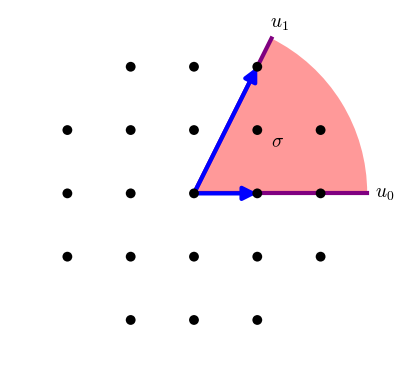

In [50]:
Sigma = A2Z2.fan()
Sigma.plot()

What happens if we actually force the theorem in by subdividing the fan to make it generate the whole lattice?

Well, we resolve the singularity! We can show that the pre-image of the cone $\sigma$ becomes the newly added ray $u_2$. This is the blow-up of a singularity.

In [51]:
A2Z2.is_smooth()

False

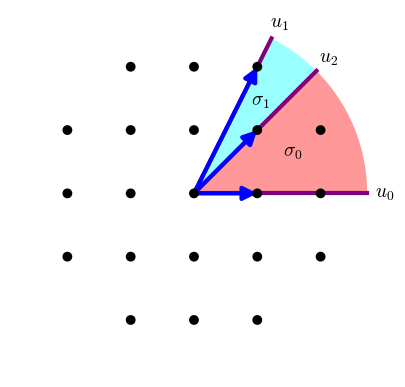

In [52]:
SigmaPrime = Sigma.subdivide(new_rays=[(1,1)])
SigmaPrime.plot()

In [53]:
# And now we build the blowup
fm = FanMorphism(identity_matrix(2),codomain=Sigma,domain_fan=SigmaPrime)
X = ToricVariety(Sigma)
Xprime = ToricVariety(SigmaPrime)
f = Xprime.hom(fm, X)
f

Scheme morphism:
  From: 2-d toric variety covered by 2 affine patches
  To:   2-d affine toric variety
  Defn: Defined by sending Rational polyhedral fan in 2-d lattice N to Rational polyhedral fan in 2-d lattice N.

In [54]:
try:
    f.as_polynomial_map()
except:
    print("Since this is a blowup, it cannot be written as a polynomial")

Since this is a blowup, it cannot be written as a polynomial


We can also check that the fiber dimension of the cone $\sigma$ is 1, as expected.

In [55]:
f.fiber_dimension(X.fan(2)[0]) == 1

True

In [56]:
Xprime.is_smooth()

True

### Discrepancies

Given a toric morphism resolving a singularity $f:X \to Y$, as the one we just defined `f`, we can pull-back divisors (or, equivalently, line-bundles) via this morphism.

An interesting result is obtained when the canonical divisor is pulled-back, as the *discrepancies* $a_i$'s will appear:

$$ K_X = f^* K_Y + \sum_i a_i E_i$$

These numbers characterise these **canonical singularities** as follows:
 - terminal if $a_i > 0$ for all $i$
 - canonical if $a_i ≥ 0$ for all $i$
 - log terminal if $a_i > −1$ for all $i$
 - log canonical if $a_i ≥ −1$ for all $i$



In [57]:
Xprime.K() - f.pullback_divisor(X.K())  # the singularity is canonical!

0

In the above example the discrepancy is $0$, hence the sicngularity is canonical. Let's try a more challenging example, in which we will see exceptional divisors appearing:

In [58]:
X = toric_varieties.dP6()
Y = toric_varieties.P2()
fm = FanMorphism(identity_matrix(2), codomain=Y.fan(), domain_fan=X.fan())
f = X.hom(fm, Y)

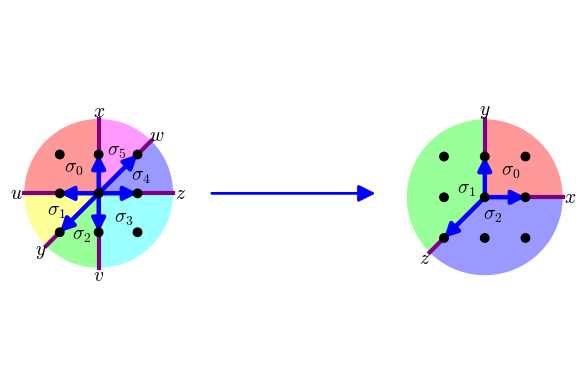

In [59]:
graphics_array([X.plot(), arrow((0, 0), (2, 0), axes=False), Y.plot()])

In [60]:
X.K() - f.pullback_divisor(Y.K())

V(u) + V(v) + V(w)

Each one of the above exceptional divisors have a discrepancy $a_i = 1$, hence the singularity is *terminal*.

### Flop transitions

In higher dimensions, the problem of simpliciality can exists. To resolve the singularity we have to subdivide the fan to make it simplicial. Subdivision is not unique: different subdivisions correspond to different resolutions.

If we imagine the deformation of the singularity going continuously from one subddivision to another, well this is a flop transition.

In physics, the corresponding concept is a phase transition.

In [61]:
toric_varieties.Conifold().fan().subdivide(make_simplicial=True).plot()

Graphics3d Object


## Toric morphisms

As we just saw in practice, a toric morphism is, first and foremost, a morphism between the fans. It is a linear map that describes how each cone of the domain fan is mapped into the cone of the codomain fan.

Hence, a toric morphism is just a matter of functorially transform the morphism between fans to a morphism between varieties. "Functorially" is the key word here, as toric geometry is nothing else than a functor from the category of fans with fan morphisms and the category of schemes with algebraic maps.

In [62]:
fan = Fan([[0,1],[1,2],[2,3],[3,0]],[[-1,0],[0,1],[1,2],[0,-1]])
F2 = ToricVariety(fan)
P1.<x,y> = toric_varieties.P1()

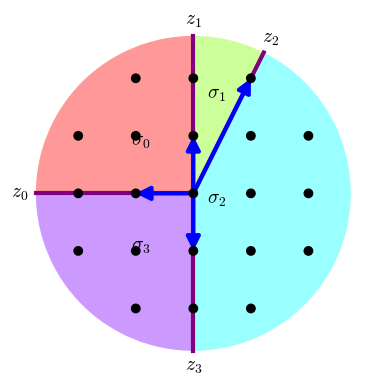

In [63]:
F2.plot()

In [64]:
fm = FanMorphism(matrix([[1],[0]]),fan,P1.fan())
fm

Fan morphism defined by the matrix
[1]
[0]
Domain fan: Rational polyhedral fan in 2-d lattice N
Codomain fan: Rational polyhedral fan in 1-d lattice N

In [65]:
f = F2.hom(fm,P1)
f.as_polynomial_map()

Scheme morphism:
  From: 2-d toric variety covered by 4 affine patches
  To:   1-d CPR-Fano toric variety covered by 2 affine patches
  Defn: Defined on coordinates by sending [z0 : z1 : z2 : z3] to
        [z2 : z0]

### Toric bundles

The morphism $\phi$ we have just created is actually a bundle morphism. We can also check the generic fiber and discover it is a $kP^1$. 

The generic fiber is found by looking at $ker \phi$.

In [66]:
f.fiber_generic()

(1-d toric variety covered by 2 affine patches, 1)

## Elliptic fibrations

Elliptic curves cannot be toric, but hypersurfaces inside toric varieties can. Assume we are fixing the basis to $kP^1$.

One way to proceed would be to find fibrations from a 3d fan to $kP^1$ and then analyse the hypersurfaces in the fiber. In particular, Batyrev showed that the Calabi–Yau condition for a hypersurface, i.e. the vanishing of the first Chern class, requires as a necessary and sufficient condition that the polytope $P_D \subset M$ of the line bundle $\mathcal O(D)$, whose section defines the hypersurface, is polar to the lattice polytope $P_D^o = \Delta^* \subset N$, where $\Delta^*$ is the convex hull of the generators $v_j$ of rays $\rho_j \in \Sigma(1)$ of the fan of the ambient toric variety.

In [67]:
P3.<x,y,z,w> = toric_varieties.P(3)
fm2 = FanMorphism(matrix([[1],[0],[0]]),domain_fan=P3.fan(),codomain=P1.fan(),subdivide=True)
blown_up_P3 = ToricVariety(fm2.domain_fan())
f1 = blown_up_P3.hom(fm2,P1)
fiber = f1.fiber_generic()[0]
fiber # represented in 3D lattice

2-d toric variety covered by 3 affine patches

In [68]:
fan = fiber.fan()
fiber.embedding_morphism()

Scheme morphism:
  From: 2-d toric variety covered by 3 affine patches
  To:   3-d toric variety covered by 6 affine patches
  Defn: Defined by sending Rational polyhedral fan in Sublattice <N(0, 1, 0), N(0, 0, 1)> to Rational polyhedral fan in 3-d lattice N.

In [69]:
# where each cone is mapped
cone1 = fm2.image_cone(Cone([[1,0,0]]))
cone2 = fm2.image_cone(Cone([[0,1,0]]))
cone3 = fm2.image_cone(Cone([[0,0,1]]))
cone4 = fm2.image_cone(Cone([[-1,-1,-1]]))
print(cone1.rays(),"\n",cone2.rays(),"\n",cone3.rays(),"\n",cone4.rays())

N(1)
in 1-d lattice N 
 Empty collection
in 1-d lattice N 
 Empty collection
in 1-d lattice N 
 N(-1)
in 1-d lattice N


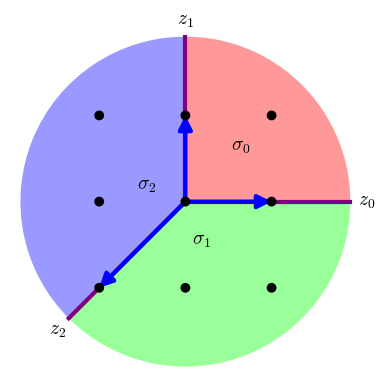

In [70]:
ray_generators = [ray.row().list()[1:] for ray in fan.rays()]
new_fan = Fan([cone.ambient_ray_indices() for cone in fan.cones(2)],ray_generators)
fiber_2d = ToricVariety(new_fan) # representation in 2D
fiber_2d.plot()

In [71]:
p = LatticePolytope(ray_generators)
p.is_reflexive() # the condition for the polytope to satisfy Batyrev creterion mentioned above

True

### Weierstrass form of the elliptic fiber

For a 2d fiber polytope corresponding to the section polytope of the anticanonical bundle $-K$ of the toric variety $X$, the Calabi-Yau condition means being an elliptic curve. Is there a way to get the Weierstrass form $y^2 = x^3 + ax +b$ of such fibration?

Of course, depending on which monomials you select within the polytope, you will get a different elliptic surface. 

#### Note
The section monomials are translated on the lattice so not to have any negative power of the variables. This traslation does not alter the sections as

$$ P_{D+div(\chi^m )} = P_D − m $$

In particular, you can express the Weierstrass form in the coordinates of every local patch simply by translating the polytope to lie within the dual cone:

$$P_D − m_\sigma ⊂ \check \sigma ⊂ M$$

In [72]:
eq = sum((-P2.K()).sections_monomials()) # one possibility: there are may others! Play around with the coefficients
eq # notice that section monomials have been translated on the positive quadrant

x^3 + x^2*y + x*y^2 + y^3 + x^2*z + x*y*z + y^2*z + x*z^2 + y*z^2 + z^3

In [73]:
a, b = WeierstrassForm(eq)
a,b


(-25/48, -1475/864)

In [74]:
from sage.schemes.toric.weierstrass import Discriminant

Discriminant(eq)

625/8

In [75]:
from sage.schemes.toric.weierstrass import Newton_polygon_embedded
polytope, polyn, _ = Newton_polygon_embedded(eq,[x,y,z])
print("Inhomogeneouss polynomial:", polyn)
# vertices of the homogeneous polynomail
polytope.vertices()


Inhomogeneouss polynomial: x^3 + x^2*y + x*y^2 + y^3 + x^2 + x*y + y^2 + x + y + 1


((0, 0, 3), (3, 0, 0), (0, 3, 0))

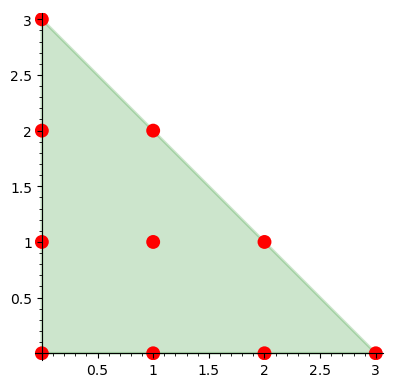

In [76]:
# After moving back to the global torus coordinates, we get the section polytope
polytope2, _, _ = Newton_polygon_embedded(polyn,[x,y])
polytope2.plot()

## Mirror symmetry

Mirror symmetry is the transformation that exchanges the complex structure with the symplectic one between the original variety $X$ and its mirror $\hat X$.

The results of Batyrev and Borisov about formula $P_D^o = \Delta^* \subset N$ have magnificent consequences in terms of understanding Mirror Symmetry.

In particular, the mirror manifold $\hat X$ of a toric variety $X$ is obtained by computing the face fan of the polytope $\Delta^*$.

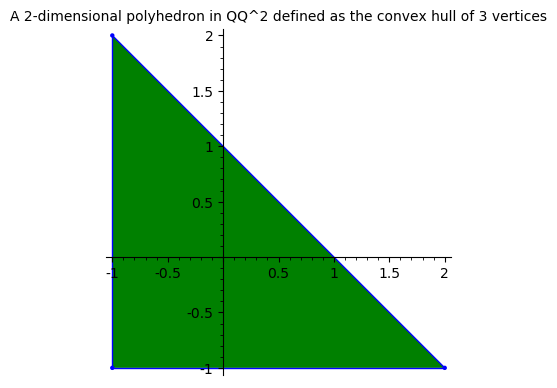

In [77]:
P_D = (-P2.K()).polyhedron()
P_D

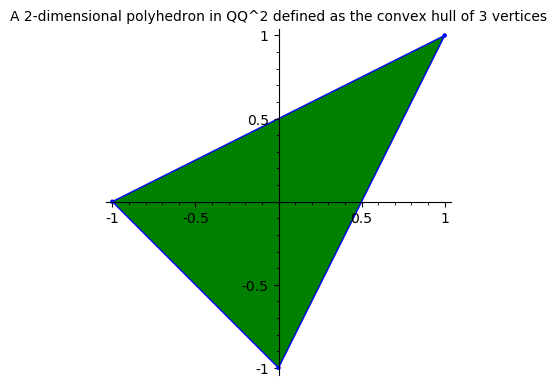

In [78]:
P_Do=P_D.polar() # this is computing P_D^o
P_Do

Here below the resulting mirror curves

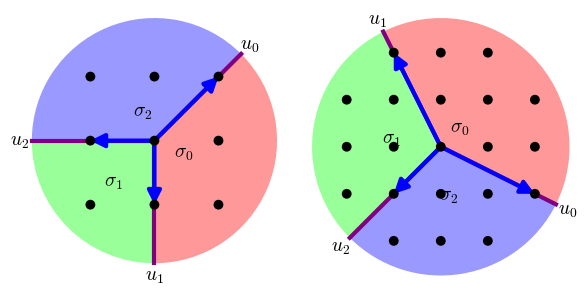

In [79]:
graphics_array([P_Do.face_fan().plot(), # P2 ...
                P_D.face_fan().plot()]) # ... and its mirror P2

#### What is actually the mirror of P^2?

We see that the generators of the dual lattice do not span the whole lattice, hence the variety is singular.

We can see that its singularity is an orbifold singularity, meaning that such variety looks like $kP^2/G$, $G$ finite group.

What is $G$? It is enough to quotient the lattices spanned by the original and dual fans. In this case, it is enough to simply take the ratio of the volumes of the volumes of the covex hull of the fan's generators (a.k.a. the polytopes we computed before!).

In [80]:
assert ToricVariety(dual_fan).is_smooth() == False
assert ToricVariety(dual_fan).is_orbifold() == True

In [81]:
P_D.volume()/P_Do.volume()

3

We have no doubt: **the mirror of $kP^2$ is $kP^2/\mathbb Z_3$.**

## Chow group

Chow group is the group whose elements are cycles (i.e. close and compact subvarieties) up to rational equivalence (i.e. I can multiply the defining polynomials of each cycle by a rational function to get to an equivalent one), where the multiplication is given by the *intersection*. Notice that, while divisors are in codim 1, the varieties in the Chow group span all dimensions.

The Chow group is graded in the codimension of the subvarieties. Is it equal to the homology groups? No. In general, it is neither injective (e.g. $X$ curve, $A^1(X)=X$ while $H_2(X,\mathbb Z)= \mathbb Z$) nor surjective (Hodge theorem states that $Im(A^i) \subset H^{i,i}$).

How can we compute the Chow group? We know already how to compte divisors (which are part of the graded piece $A^1(X)$ of the Chow group): divisors are the closure of the orbits associate to rays. 

If we consider all the other orbits -- associated to the higher dimensional cones -- we can also compute their closure. So, without thinking about rational equivalence, the elements of the Chow group can be found among the torus orbits of the toric variety $X$.

How can we understand the rational equivalence between two such elements (of same codimension, of course)? The short answer is to consider the ones of the divisors: for lower dimensional varieties, it will be then automatic.

Are there other relations between the variety of the Chow group? Yes: we have to understand how the orbit closures intersect.

Let's take a 3D lattice and a pair of 2D cones as below:

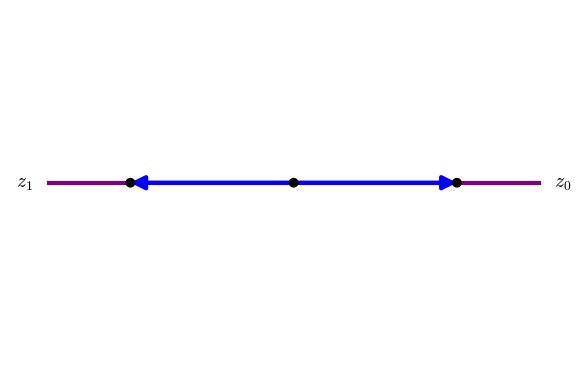

In [82]:
P1 = ToricVariety(Fan([[0],[1]],[[1],[-1]]))
P1.plot()

The two orbits associated to the rays are the points $[1:0]$ and $[0:1]$. These two points do not intersect but they are linearly equivalent (as the rational functions $x/y$ and $y/x$ will map one to the other)

In [83]:
P1.Chow_group().degree(1)

Z

### Combinatorial description

More generally, the idea to find the Chow group is to understand the relations between all the orbits. To do so, one can use this combinatorial description:
 1. Consider the ring $\mathbb Z[X_1,...,X_r]$, where $r$ is the number of rays, where one associates to each rays a variable (the homogeneous coordinate)
 2. Build the ideal $\mathcal I$ consisting of the linear equivalence relations between the rays coordinate-wise (for $P^2$, they are $X_1-X_3$ and $X_2-X_3$)
 3. Build the ideal $\mathcal J$ consisting of monomials associated to all the cones NOT belonging to the fan (e.g. for $P^2$ the only monomial is $X_1X_2X_3$). These are related to orbits closure intersections: in $P^2$ the orbits corresponing to the three rays do not have a common intersection point (but intersect pairwise). This ideal is the Stanley-Reissner ideal
 
The Chow ring is:
$$\mathbb Z[X_1,...,X_r]/(\mathcal I + \mathcal J)$$

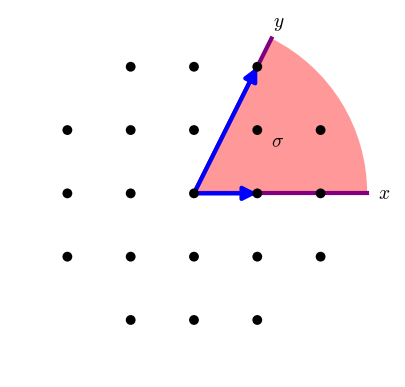

In [84]:
toric_varieties.A2_Z2().plot() # singular

In [85]:
# this ideal describes the impossible intersections of the divisors.
# you will use it to quotient out such relations.
P2.Stanley_Reisner_ideal()

Ideal (x*y*z) of Multivariate Polynomial Ring in x, y, z over Rational Field

In [86]:
AA = toric_varieties.A2_Z2().Chow_group()
AA.gens() # we have both dimension 0 and 1. Both are Z_2 torsion, given by relations of the form 2X_i=0


((| 1 mod 2 | 0 ), (| 0 mod 2 | 1 ))

In [87]:
print(AA.degree(0),AA.degree(1),AA.degree(2))

0 C2 Z


In [88]:
AA.relations()

Free module of degree 4 and rank 3 over Integer Ring
Echelon basis matrix:
[0 1 1 0]
[0 0 2 0]
[0 0 0 1]

## Cohomology group

The Poincaré dual of the homology group. Elements in the homology group $H^*(X,\mathbb Z)$ are cycles. In cohomology you look at $Hom(H^*(X),\mathbb Z)$. Divisors define elements in $H^{n-2}(X,\mathbb Z)$, and by duality they also correspond to a cohomology class.

With respect to the Chow group, remove all the torsion elements (i.e. those defined by something like $2X_i=0$) and dualise the grading (consequence of Poincaré duality).

In [89]:
P2.cohomology_basis()

(([1],), ([z],), ([z^2],))

In [90]:
D.cohomology_class() # class of the divisor D=V(x) + V(y) in cohomology. 

[2*z]

In [91]:
toric_varieties.A2_Z2().cohomology_basis() # w.r.t. to chow ring, the torsion part has disappeared

(([1],), (), ())

### Intersections of the divisors

Using the cohomology representative of a divisor, it is possible to integrate the cohomology wedge product of classes over the toric variety. The intersection number is indeed the value of the integral.

In [92]:
XX = toric_varieties.dP8()
HH = XX.cohomology_ring()
Div_cohom = [ HH(c) for c in XX.fan(dim=1) ]
matrix([ [ XX.integrate(Div_cohom[i]*Div_cohom[j]) for i in range(0,3) ] for j in range(0,3) ])

# we recognise the self-intersection of the exceptional divisor to be -1

[-1  1  0]
[ 1  0  1]
[ 0  1  1]

In [93]:
# for orbifolds, the intersection numbers are in QQ

XX = toric_varieties.P2_123()
HH = XX.cohomology_ring()
Div_cohom = [ HH(c) for c in XX.fan(dim=1) ]
print(Div_cohom[0]*Div_cohom[0], Div_cohom[0]*Div_cohom[1])
matrix([ [ XX.integrate(Div_cohom[i]*Div_cohom[j]) for i in range(0,3) ] for j in range(0,3) ])



[4*z2^2] [6*z2^2]


[2/3   1 1/3]
[  1 3/2 1/2]
[1/3 1/2 1/6]

## Chern classes

To a line bundle $\pi: M \to X$ over a manifold $X$ we can associate a class in the Chow group $A(X)$. To define an element in the Chow group, take a section $s$ of the bundle $\pi:M \to X$ and consider its zero locus $s=0$. This indeed defines an element in $A^{1} \sim H^2(X, \mathbb Z)$, where $dim X = n$. This element is called $c_1$. 

For higher rank bundles, it is possible to associate other higher dimensional Chern classes:
 1. Take the projectivisation of the bundle $\mathbb P(V)$
 2. Consider the tautological line bundle $O(1)$ over the projectivisation $\mathbb P(V)$
 3. Compute $c_1$ for the tautological bundle
 4. $c_1 := c_1(O(1))$ and its powers generate the whole $A(\mathbb P(V))$ as free module of rank $r$ over $A(X)$
 5. The coefficients in the expansion of $c_1^r=r - c_1(X) c_1 + c_2(X) c_1^2 -...$ are the higher chern classes
 
Writing $c_i(X)$ actually means $c_i(TX)$.

In the toric case, since the Chow group is made of torus orbits closures, the totale Chern class is:

$$c(X)=\sum_{\sigma \in \Sigma} [cl(O_\sigma)],$$

where $[cl(O_\sigma)]$ means the class in cohomoloy. 

The Todd class, also another characteristic class, is very similar:

$$td(X)=\sum_{\sigma \in \Sigma} r_{\sigma}[cl(O_\sigma)], r_{\sigma} \in \mathbb Q$$

In 2D the Todd class is:
$$td(X) = [X] + \frac{1}{2} \sum_{i \in \Sigma(1)}[D_i] + {pt}$$

In [94]:
P2.<x,y,z> = toric_varieties.P2() # variety
P2.Chern_class(), P2.Todd_class() # these are intrinsically associated to the tangent bundle

([3*z^2 + 3*z + 1], [z^2 + 3/2*z + 1])

In [95]:
P2.integrate(P2.Chern_class())   # Euler number of P2

3

In [96]:
def euler_char(X):
    return X.integrate(X.Chern_class())
    
euler_char(toric_varieties.P(3)) == toric_varieties.P(3).Euler_number()


True

### Grothendieck-Riemann-Roch

We can also verify the Grothendieck-Riemann-Roch theorem for the tangent bundle. On the one hand, we compute the euler characterstic $\chi(TX)$ using the Chern character and the Todd class; on the other hand, we alternatively sum over the cohomology groups $H^i(X,TX)$ to find $\chi(TX)$.

In [97]:

chi = P2.integrate(P2.Chern_character() * P2.Todd_class())    # Euler number of the tangent bundle
chi

8

In [98]:
TP2 = P2.sheaves.tangent_bundle()
betti_numbers=sum([TP2.cohomology(weight=(i,j),dim=True) for i in range(-4,4) for j in range(-4,4)])
chi2 = sum([(betti_numbers[i])*(-1)**i for i in range(len(betti_numbers))])
chi2

8

In [99]:
assert chi == chi2

### Serre duality

Here we verify the Serre duality statement on the sheaf cohomology:
$$H^i(X,F)=H_{n-i}(X,F^* \otimes K)$$
More details about sheaf cohomology are provided in the appendix.

In [100]:
D = P2.divisor(x) + P2.divisor(y)
bdl1 = P2.sheaves.line_bundle(D)
dualising = P2.sheaves.line_bundle(P2.K()) # this is our F. could take others
bdl2 = (bdl1.dual()).tensor_product(dualising) # this is F^* x K


In [101]:
cohom = sum([bdl1.cohomology(weight=(i,j),dim=True) for i in range(-3,3) for j in range(-3,3)]).list()
dual_cohom = sum([bdl2.cohomology(weight=(i,j),dim=True) for i in range(-3,3) for j in range(-3,3)]).list()
print(cohom, dual_cohom)

[6, 0, 0] [0, 0, 6]


In [102]:
dual_cohom.reverse()
assert cohom == dual_cohom


## Appendix: Torus equivariant bundles
(This section is more advanced and bases on the work of A. Klyachko, EQUIVARIANT BUNDLES ON TORAL VARIETIES)

Torus equivariant bundles are bundles in which the torus action is lifted to the total space of the bundle: points of the base are translated as usual, while the fibers are mapped linearly to other fibers and compatibly with the projection on the base.

#### Theorem
When restricted to the affine patches of a non-singular variety, the toric bundles trivialise.

Hence, it is enough to describe a toric bundle via the generic fiber (fiber over $[1:1:...:1]$ and the glueing over the rays. Actually, this glueing is also equivalent to choosing a representation of the torus action over the generic fiber $\psi_\sigma: (k^*)^n \to Aut(E)$, with $E$ generic fiber, for each $\sigma \in \Sigma$. Given the representations over all $\sigma \in \Sigma$, the transition maps of the bundle from $\sigma_1$ to $\sigma_2$ are $\psi_{\sigma_1} \circ \psi^{-1}_{\sigma_2}$.

#### Observation
A toric bundle is equivalent to a set of representations of $T$ acting over $E$.

#### Filtration explicitly
$$E^\rho(m) := \{v \in E |\exists \lim_{tx_0 \to x_\rho} t^{-m}(t\cdot v) \}, m \in M$$
where $t\cdot v$ means $t$ acting on $E$ and $x_0=(1,1,...,1)$.
This filtration -- so Klyachko showed -- only depends on the integer $i=<m,\rho>$. Notice that this filtration encodes the gluing data at the $x_i=0$ divisors: it is a graded filtration associated to each ray $\rho_i$.

Let's compute explicitly the filtration spaces

In [103]:
OD = P2.sheaves.line_bundle(D)
example = P2.sheaves.tangent_bundle().direct_sum(P2.sheaves.tangent_bundle()) # bundle TP^2 + TP^2
[(i, example.filtration_intersection(P2.fan(1)[2],i)) for i in range(-5,5)] # E^(-1,-1)(i)

[(-5, Vector space of degree 4 and dimension 4 over Rational Field
  Basis matrix:
  [1 0 0 0]
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]), (-4, Vector space of degree 4 and dimension 4 over Rational Field
  Basis matrix:
  [1 0 0 0]
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]), (-3, Vector space of degree 4 and dimension 4 over Rational Field
  Basis matrix:
  [1 0 0 0]
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]), (-2, Vector space of degree 4 and dimension 4 over Rational Field
  Basis matrix:
  [1 0 0 0]
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]), (-1, Vector space of degree 4 and dimension 4 over Rational Field
  Basis matrix:
  [1 0 0 0]
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]), (0, Vector space of degree 4 and dimension 4 over Rational Field
  Basis matrix:
  [1 0 0 0]
  [0 1 0 0]
  [0 0 1 0]
  [0 0 0 1]), (1, Vector space of degree 4 and dimension 2 over Rational Field
  Basis matrix:
  [1 1 0 0]
  [0 0 1 1]), (2, Vector space of degree 4 and dimension 0 over Rational Field
  Basis matrix:
  []), (3, Vector sp

In [104]:
example.get_filtration() # looking at the vector spaces above, the filtration should be QQ^4-->QQ^2-->0 (only the interesting part)


Filtrations
    N(-1, -1): QQ^4 >= QQ^2 >= 0
      N(0, 1): QQ^4 >= QQ^2 >= 0
      N(1, 0): QQ^4 >= QQ^2 >= 0

In the next example, we conside the bundle $\mathcal O(2D)$, where $D$ is the unique divisor class.
The representation in this case is:
 - outside the orbit corresponding to $D$, $t \cdot v = \mu [1]$, if $v=[1]$, $\mu \in k^*$
 - on the orbit associated to $D$, $t \cdot v = \mu^{-2}[1]$, $\mu \in k^*$
 
Hence, the results are nontrivial till $i=3$, as the transition map is $\mu^{-2}\mu^{-1}$.

In [105]:
example2 = P2.sheaves.line_bundle(2*P2.divisor(z)) # bundle O(D)
[(i, example2.filtration_intersection(P2.fan(1)[2],i)) for i in range(-5,5)] # E^(-1,-1)(i)

[(-5, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (-4, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (-3, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (-2, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (-1, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (0, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (1, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (2, Vector space of degree 1 and dimension 1 over Rational Field
  Basis matrix:
  [1]), (3, Vector space of degree 1 and dimension 0 over Rational Field
  Basis matrix:
  []), (4, Vector space of degree 1 and dimension 0 over Rational Field
  Basis matrix:
  [])]

In [106]:
# define some torus-equivariant bundles
triv_P2 = P2.sheaves.trivial_bundle(3) # trivial bundle with fiber k^3
TP2 = P2.sheaves.tangent_bundle()
sum_OD = OD.direct_sum(OD) # direct sum of line bundle, D = V(x) + V(y)

In [107]:
TP2.fiber()     # Vector space over big torus, i.e. the generic fiber

Vector space of dimension 2 over Rational Field

In [108]:
# Klyachko filtration
TP2.get_filtration()
# graded filtration for each ray

Filtrations
    N(-1, -1): QQ^2 >= QQ^1 >= 0
      N(0, 1): QQ^2 >= QQ^1 >= 0
      N(1, 0): QQ^2 >= QQ^1 >= 0

In [109]:
OD.get_filtration()

Filtrations
    N(-1, -1): QQ^1 >=  0   >= 0
      N(0, 1): QQ^1 >= QQ^1 >= 0
      N(1, 0): QQ^1 >= QQ^1 >= 0

In [110]:
sum_OD.get_filtration()

Filtrations
    N(-1, -1): QQ^2 >=  0   >= 0
      N(0, 1): QQ^2 >= QQ^2 >= 0
      N(1, 0): QQ^2 >= QQ^2 >= 0

#### Observation

We clearly see that the tangent bundle $TX$ has a different filtration than $\mathcal O(D) \oplus \mathcal O(D)$, even if the rank is the same.

In [111]:
triv_P2.get_filtration()

Filtrations
    N(-1, -1): QQ^3 >= 0
      N(0, 1): QQ^3 >= 0
      N(1, 0): QQ^3 >= 0

In [112]:
V = TP2.wedge(2) + OD * TP2 + triv_P2 # + is direct sum, * is tensor prod
V

Rank 6 bundle on 2-d CPR-Fano toric variety covered by 3 affine patches.

In [113]:
V.get_filtration()

Filtrations
    N(-1, -1): QQ^6 >= QQ^2 >=  0   >= 0
      N(0, 1): QQ^6 >= QQ^3 >= QQ^1 >= 0
      N(1, 0): QQ^6 >= QQ^3 >= QQ^1 >= 0

### Sheaf cohomology

Using the filtrations defined above, it is also possible to compute sheaf cohomology group $H^p(X,\mathcal E)$ where $\mathcal E$ is the bundle we are considering. In general, these groups can be computed from the resolution of $\mathcal E$, hence the importance of the above filtrations.

Furthermore, since we are using the filtrations $E^\rho(m)$, we have to specify $m$ to get a result (each $m$ is associated to the eigen-component of the action of the bundle automorphism induced by the torus action on the fibers).

In [114]:
V.cohomology(weight=(0,1)) # here m = (0,1)

{0: Vector space of dimension 3 over Rational Field,
 1: Vector space of dimension 0 over Rational Field,
 2: Vector space of dimension 0 over Rational Field}

In [115]:
def bdl_cohom(bdl, bound):
    return [[bdl.cohomology(weight=(i,j), dim=True) for i in range(-bound,bound)] for j in range(-bound,bound)]

bdl_cohom(triv_P2,3)

[[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (3, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]]

In [116]:
bdl_cohom(V,3)

[[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (2, 0, 0), (1, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (0, 0, 0), (2, 0, 0), (3, 0, 0), (1, 0, 0)],
 [(0, 0, 0), (0, 0, 0), (2, 0, 0), (6, 0, 0), (3, 0, 0), (1, 0, 0)],
 [(0, 0, 0), (2, 0, 0), (3, 0, 0), (3, 0, 0), (3, 0, 0), (1, 0, 0)],
 [(0, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0), (0, 0, 0)]]